In [1]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
sys.path
import data_loader as dl

Used to clean the data for the best and worst data graphs. Drops decoys and duplicate scans. 

In [2]:
def filter_data(df, prob_column):
     #drop decoys
    df = df[df["decoy"]== 'False']
    #sort by qvalue
    df = df.sort_values(prob_column)
    #Drop duplicates
    df = df.drop_duplicates(subset=["scan"], keep="first") #keep highest scoring

    return df

Used to clean data for the decoy graph. Pulls out decoys and drops duplicate scans. 

In [3]:
def filter_decoy_data(df, prob_column):
     #drop decoys
    df = df[df["decoy"]== 'True']
    #Drop duplicates
    df = df.drop_duplicates(subset=["scan"], keep="first") #keep highest scoring

    return df

In [4]:
def get_data(before_df):

    data = pd.read_csv(before_df, sep = "\t")    
    data = filter_data(data, "QValue")
    
    return data

In [5]:
def get_decoy_data(before_df):

    data = pd.read_csv(before_df, sep = "\t")     
    data = filter_decoy_data(data, "QValue")
    
    return data


Getting the data for the best data graph. Clean all the data, pull out the data that has a QValue of 0.0 and make the graph.

In [6]:
best_data = get_data("test.tsv")

#take only scans with 0 Qvalue
best_data = best_data[best_data["QValue"]== 0.0]
best_data = best_data.head(300)
best_data

/Users/daishavanderwatt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Unnamed: 0,File Name,scan,y,Num Experimental Peaks,Total Ion Current,Precursor Scan Number,Precursor Charge,Precursor MZ,Precursor Mass,...,QValue,Cumulative Target Notch,Cumulative Decoy Notch,QValue Notch,PEP,PEP_QValue,temp_peptide,peptide,x,y_pred
0,0,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,16668,52.52059,101.0,335251.91071,16649,2.0,1280.62814,2559.24172,...,0.0,6,0.0,0.0,0.000024,0.000010,LVQDVANNTNEEAGDGTTTATVLAR,LVQDVANNTNEEAGDGTTTATVLAR,LVQDVANNTNEEAGDGTTTATVLAR,52.779780
4224,4224,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,11505,40.21101,93.0,280621.26892,11487,3.0,496.24615,1485.71662,...,0.0,33891,0.0,0.0,0.000015,0.000006,RDPHLAC[Common Fixed:Carbamidomethyl on C]VAYER,RDPHLACVAYER,RDPHLAC2VAYER,39.723965
4223,4223,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,6188,27.61035,70.0,135619.72083,6170,2.0,505.76641,1009.51826,...,0.0,33886,0.0,0.0,0.000025,0.000011,VEQHVVDGK,VEQHVVDGK,VEQHVVDGK,31.229920
4222,4222,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,26968,77.17926,74.0,177492.46899,26948,2.0,786.88324,1571.75192,...,0.0,33866,0.0,0.0,0.000469,0.000089,FGFPEGSVELYAEK,FGFPEGSVELYAEK,FGFPEGSVELYAEK,75.905970
4221,4221,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,12997,43.77077,82.0,202263.41882,12984,3.0,577.27851,1728.81370,...,0.0,33851,0.0,0.0,0.000071,0.000025,NVTDVVNTC[Common Fixed:Carbamidomethyl on C]HD...,NVTDVVNTCHDAGISK,NVTDVVNTC2HDAGISK,43.568080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121,4121,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,23704,69.34007,65.0,156625.87585,23691,3.0,555.94774,1664.82138,...,0.0,32994,0.0,0.0,0.000082,0.000028,YEDFSNLGTTHLLR,YEDFSNLGTTHLLR,YEDFSNLGTTHLLR,68.551600
4120,4120,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,14791,48.04092,82.0,249153.65375,14779,2.0,642.87939,1283.74422,...,0.0,32986,0.0,0.0,0.000139,0.000040,LASVPGSQTVVVK,LASVPGSQTVVVK,LASVPGSQTVVVK,47.661650
4119,4119,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,16310,51.67092,84.0,175718.28577,16297,3.0,611.29374,1830.85941,...,0.0,32970,0.0,0.0,0.000079,0.000027,IM+15.995DPNIVGSEHYDVAR,IM+15.995DPNIVGSEHYDVAR,IM1DPNIVGSEHYDVAR,52.871876
4118,4118,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,21153,63.23001,97.0,215562.20636,21138,3.0,646.35233,1936.03515,...,0.0,32964,0.0,0.0,0.000029,0.000012,ALPAVQQNNLDEDLIRK,ALPAVQQNNLDEDLIRK,ALPAVQQNNLDEDLIRK,64.536960


Graph representing some of the best scored scans

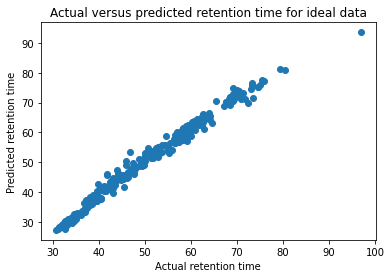

In [7]:
plt.scatter(best_data['y_pred'], best_data['y'])
plt.ylabel("Predicted retention time")
plt.xlabel("Actual retention time")
plt.title("Actual versus predicted retention time for ideal data")
plt.show()

Formatting and cleaning the data for the graph representing some of the worst scoring data

In [8]:
worst_data = get_data("test.tsv")
worst_data = worst_data.tail(300)

/Users/daishavanderwatt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


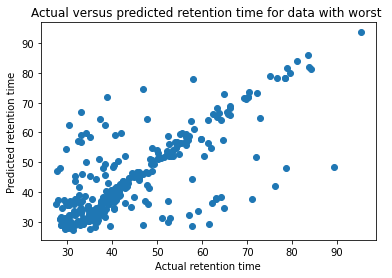

In [9]:
plt.scatter(worst_data['y_pred'], worst_data['y'])
plt.ylabel("Predicted retention time")
plt.xlabel("Actual retention time")
plt.title("Actual versus predicted retention time for data with worst ")
plt.show()

Graph representing decoy data

In [10]:
decoy_data = get_decoy_data("test.tsv")
decoy_data = decoy_data.head(300)
decoy_data

,Unnamed: 0,File Name,scan,y,Num Experimental Peaks,Total Ion Current,Precursor Scan Number,Precursor Charge,Precursor MZ,Precursor Mass,...,QValue,Cumulative Target Notch,Cumulative Decoy Notch,QValue Notch,PEP,PEP_QValue,temp_peptide,peptide,x,y_pred
8138,8138,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,13373,44.66281,200.0,3.754640e+06,13359,2.0,458.25823,914.50191,...,0.000458,56753,27.0,0.000462,0.404217,0.011020,VEQDILAK,VEQDILAK,VEQDILAK,42.322254
9271,9271,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,14448,47.22267,60.0,1.894570e+05,14427,2.0,406.75289,811.49124,...,0.000826,64652,52.0,0.000803,0.004314,0.000426,PLLGAVSR,PLLGAVSR,PLLGAVSR,47.973590
9921,9921,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,11675,40.61797,96.0,4.089807e+05,11663,2.0,478.77489,955.53523,...,0.000896,67261,59.0,0.000875,0.072843,0.002575,PIGQSIDVK,PIGQSIDVK,PIGQSIDVK,42.292347
10090,10090,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,9486,35.42470,102.0,3.102589e+05,9467,2.0,501.28464,1000.55473,...,0.000983,68003,65.5,0.000963,0.099350,0.003182,KAQGELLDK,KAQGELLDK,KAQGELLDK,37.105255
10094,10094,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,6446,28.22268,88.0,6.465188e+05,6434,2.0,601.32415,1200.63374,...,0.000997,68013,66.5,0.000977,0.585276,0.018169,LKGALQEAEDK,LKGALQEAEDK,LKGALQEAEDK,35.195050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16569,16569,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,16725,52.65596,146.0,3.124429e+05,16704,2.0,517.79105,1033.56754,...,0.027979,1999,627.0,0.313657,0.999951,0.266363,KEKMEQLK,KEKMEQLK,KEKMEQLK,32.113300
16571,16571,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,8086,32.10110,109.0,4.576445e+05,8069,2.0,514.79042,1027.56629,...,0.028065,101026,2259.7,0.022367,0.999467,0.189646,KEGKNDLPK,KEGKNDLPK,KEGKNDLPK,31.354631
16575,16575,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,16452,52.00810,112.0,2.418065e+05,16440,2.0,700.85438,1399.69421,...,0.028111,2004,633.0,0.315868,0.988252,0.098266,ENVVEGTENLPAK,ENVVEGTENLPAK,ENVVEGTENLPAK,45.543884
16578,16578,Ex_Auto_J3_30umTB_2ngQC_60m_1-calib,9612,35.72404,116.0,6.246679e+05,9600,2.0,397.71083,793.40710,...,0.028158,101041,2265.7,0.022423,0.994938,0.120262,SGFLGGTR,SGFLGGTR,SGFLGGTR,45.162342


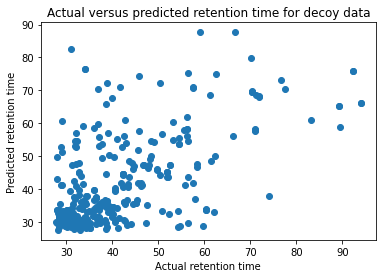

In [11]:
plt.scatter(decoy_data['y_pred'], decoy_data['y'])
plt.ylabel("Predicted retention time")
plt.xlabel("Actual retention time")
plt.title("Actual versus predicted retention time for decoy data")
plt.show()